In [1]:
library(patchwork)
library(ggplot2)
library(magick)
library(tidytext)
library(SingleCellExperiment)
library(tidyHeatmap)
library(dplyr)
library(tidyr)
library(plotgardener)
library(ggplot2)
library(ggrepel)
library(gridExtra)
library(RColorBrewer)
library(reshape2)
source('./ABCA7lof2/plotting.r')

Linking to ImageMagick 7.1.1.11
Enabled features: cairo, fontconfig, freetype, fftw, rsvg, webp, x11
Disabled features: ghostscript, heic, lcms, pango, raw

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: 'MatrixGenerics'


The following objects are masked from 'package:matrixStats':

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs,

In [17]:
colors = readRDS('./processed_data/Cell_group_colors.rds')
cols = c('grey', 'red')
names(cols) = c('Con', 'LoF')

<u>**Extended Figure 1**</u>
##### Cohort metadata overview
<a name="EF1"></a>

In [19]:
# proteomics data
proteomics = read.csv('.//processed_data//for_plotting/ABCA7_proteomics.csv')
# metadata
all_data = readRDS('./processed_data/single_cell/stats_input_data.rds')

In [21]:
proteomics$LOF = ifelse(proteomics$LOF==1, 'LoF', 'Con')
proteomics$LOF = factor(proteomics$LOF, levels = c('Con', 'LoF'))

p000 = boxplot_w_stats(df = proteomics, x = 'LOF', y = 'ABCA7', palette = cols, comparisons = list(c('Con', 'LoF')), xlab = '', ylab = 'ABCA7', width = .5, alpha = .5)+ theme(legend.position="none")+ggtitle('All')
p001 = boxplot_w_stats(df = proteomics, x = 'LOF', y = 'RBFOX3', palette = cols, comparisons = list(c('Con', 'LoF')), xlab = '', ylab = 'RBFOX3', width = .5, alpha = .5)+ theme(legend.position="none")+ggtitle('All')
p002 = boxplot_w_stats(df = proteomics[proteomics$grp==TRUE,], x = 'LOF', y = 'ABCA7', palette = cols, comparisons = list(c('Con', 'LoF')), xlab = '', ylab = 'ABCA7', width = .5, alpha = .5)+ theme(legend.position="none")+ggtitle('Subset')
p003 = boxplot_w_stats(df = proteomics[proteomics$grp==TRUE,], x = 'LOF', y = 'RBFOX3', palette = cols, comparisons = list(c('Con', 'LoF')), xlab = '', ylab = 'RBFOX3', width = .5, alpha = .5)+ theme(legend.position="none")+ggtitle('Subset')
p004 = get_permutation_plot('RBFOX3', proteomics)
p005 = get_permutation_plot('ABCA7', proteomics)

Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
i Please use `linewidth` instead."


In [32]:
proteomics$norm_ABCA7 = proteomics$ABCA7-proteomics$RBFOX3
pi = boxplot_w_stats(df = proteomics, x = 'LOF', y = 'norm_ABCA7', palette = cols, comparisons = list(c('Con', 'LoF')), xlab = '', ylab = 'ABCA7-RBFOX3', width = .5, alpha = .5)+ theme(legend.position="none")+ggtitle('All')
pii = boxplot_w_stats(df = proteomics[proteomics$grp==TRUE,], x = 'LOF', y = 'norm_ABCA7', palette = cols, comparisons = list(c('Con', 'LoF')), xlab = '', ylab = 'ABCA7-RBFOX3', width = .5, alpha = .5)+ theme(legend.position="none")+ggtitle('Subset')

plot_grp0 = (((p000|pi|p001)/(p002|pii|p003))|(p004/p005))+plot_layout(widths = c(3,1))

# load the data
features = c('amyloid', 'nft','age_death', 'pmi')

# continuous variables by variant
metadata = all_data$summary
metadata$LOF = ifelse(metadata$LOF==1, 'LoF', 'Con')
metadata$LOF = factor(metadata$LOF, levels = c('Con', 'LoF'))

plt00 = boxplot_w_stats(df = as.data.frame(metadata), x = 'LOF', y = features[1], palette = cols, comparisons = list(c('Con', 'LoF')), xlab = '', ylab = features[1], width = .5, alpha = .5)+ theme(legend.position="none")
plt01 = boxplot_w_stats(df = as.data.frame(metadata), x = 'LOF', y = features[2], palette = cols, comparisons = list(c('Con', 'LoF')), xlab = '', ylab = features[2], width = .5, alpha = .5)+ theme(legend.position="none")
plt02 = boxplot_w_stats(df = as.data.frame(metadata), x = 'LOF', y = features[3], palette = cols, comparisons = list(c('Con', 'LoF')), xlab = '', ylab = features[3], width = .5, alpha = .5)+ theme(legend.position="none")
plt03 = boxplot_w_stats(df = as.data.frame(metadata), x = 'LOF', y = features[4], palette = cols, comparisons = list(c('Con', 'LoF')), xlab = '', ylab = features[4], width = .5, alpha = .5)+ theme(legend.position="none")
#plt04 = boxplot_w_stats(df = as.data.frame(metadata), x = 'LOF', y = features[5], palette = cols, comparisons = list(c('Con', 'LoF')), xlab = '', ylab = features[5], width = .5, alpha = .5)+ theme(legend.position="none")

# categorical variables by genotype
features = c('ad_reagan', 'msex','apoe_genotype', 'cogdx')
plt10 = get_barplot(as.data.frame(metadata), 'LOF', features[1])
plt11 = get_barplot(as.data.frame(metadata), 'LOF', features[2])
plt12 = get_barplot(as.data.frame(metadata), 'LOF', features[3])
plt13 = get_barplot(as.data.frame(metadata), 'LOF', features[4])
#plt14 = get_barplot(as.data.frame(metadata), 'LOF', features[5])

cont_plots = (plt00|plt01|plt02|plt03)#|plt04)
disc_plots = (plt10|plt11|plt12|plt13)#|plt14)

# get the images
img = image_read('../ABCA7lof/processed_data/for_plotting/Asset 1.png')#, native = TRUE)
p1 = image_ggplot(image_border((img), "grey", "4x4"))+ggtitle('rs547447016 (c.2126_2132delACGAGGA)')+theme(plot.title = element_text(color = "grey"))
p2 = image_ggplot(image_border((img), "red", "4x4"))+ggtitle('rs547447016 (c.2126_2132delACGAGGA)')+theme(plot.title = element_text(color = "red"))
p3 = image_ggplot(image_border((img), "grey", "4x4"))+ggtitle('rs201060968 (c.3641G>A)')+theme(plot.title = element_text(color = "grey"))
p4 = image_ggplot(image_border((img), "red", "4x4"))+ggtitle('rs201060968 (c.3641G>A)')+theme(plot.title = element_text(color = "red"))
p5 = image_ggplot(image_border((img), "grey", "4x4"))+ggtitle('chr19.1053362_G_A')+theme(plot.title = element_text(color = "grey"))
p6 = image_ggplot(image_border((img), "red", "4x4"))+ggtitle('chr19.1053362_G_A')+theme(plot.title = element_text(color = "red"))
pA = (p1/p2/p3/p4/p5/p6)

Warning message in wilcox.test.default(c(1.15125, 11.79375, 0, 6.93833333333333, :
"cannot compute exact p-value with ties"
Warning message in wilcox.test.default(c(5.25, 5.83333333333333, 4.08333333333333, :
"cannot compute exact p-value with ties"
Warning message in wilcox.test.default(c(1.15125, 11.79375, 0, 6.93833333333333, :
"cannot compute exact p-value with ties"
Warning message in wilcox.test.default(c(5.25, 5.83333333333333, 4.08333333333333, :
"cannot compute exact p-value with ties"


png 
  2

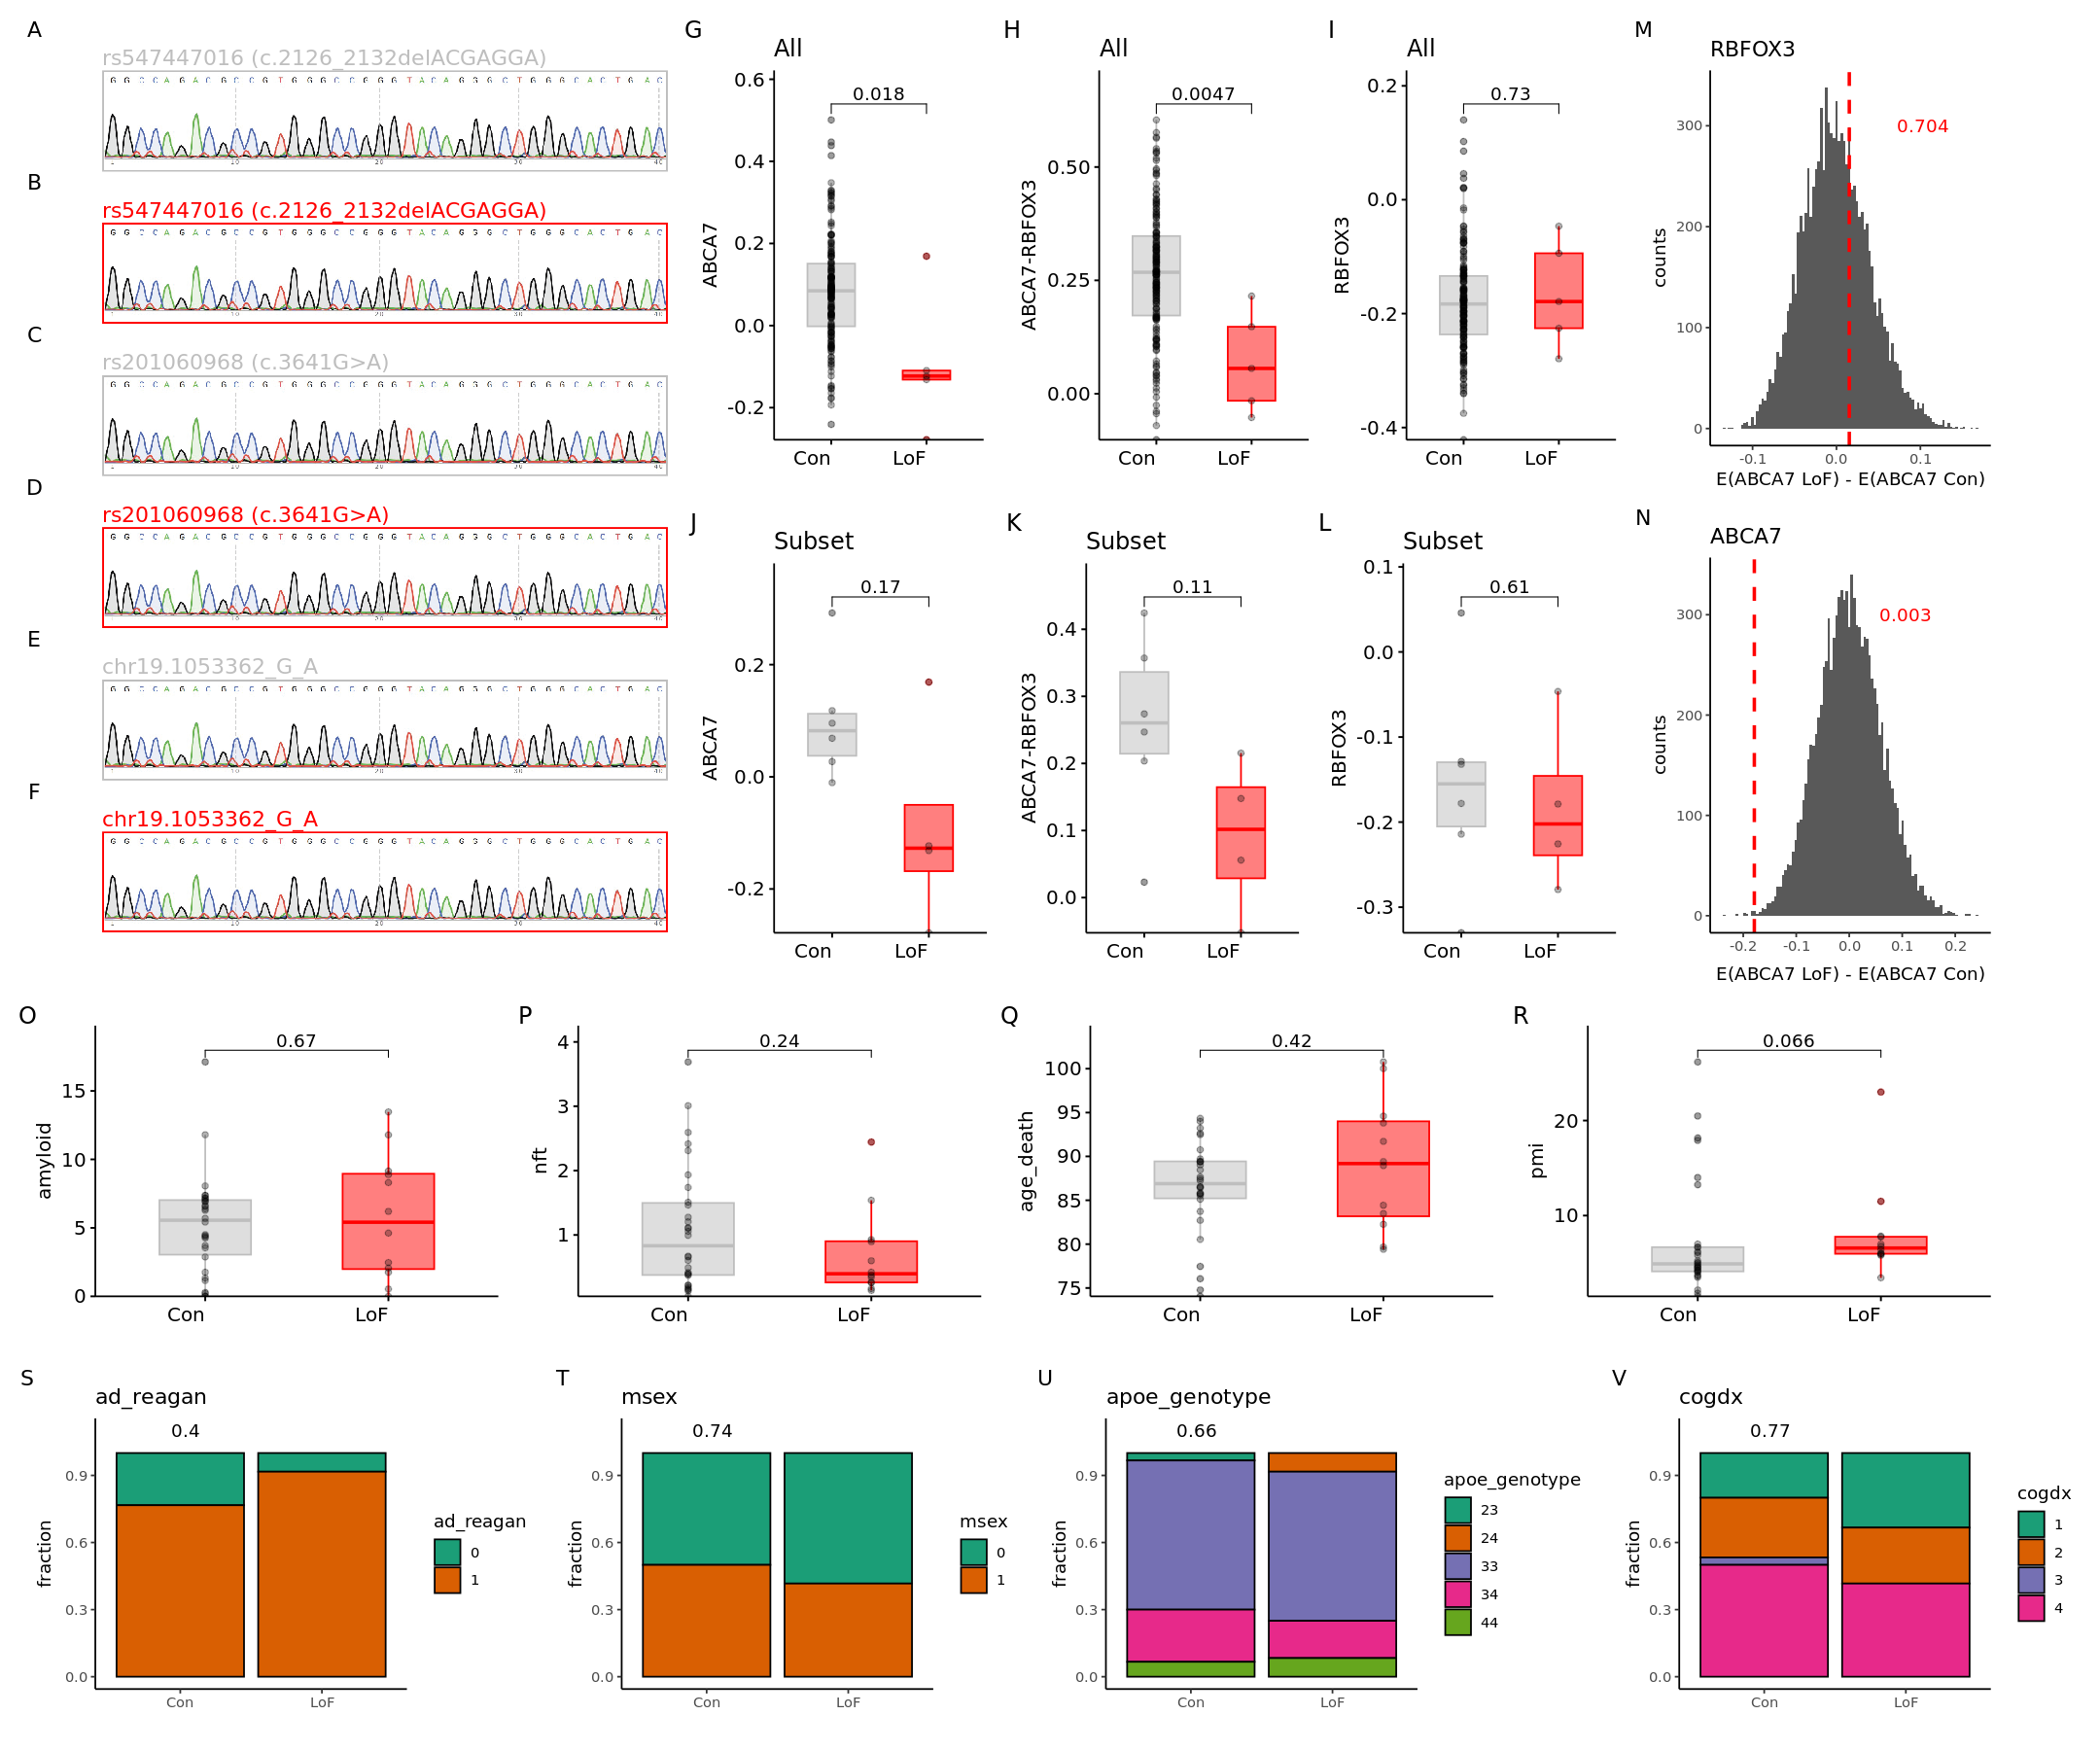

In [33]:
# show all 
options(repr.plot.width=18, repr.plot.height=15)

extended1 = (((pA|plot_grp0) + plot_layout(widths=c(1,2.1)))/(cont_plots/disc_plots + plot_layout(heights = c(1, 1)))) + plot_layout(heights=c(1.3,1)) + plot_annotation(tag_levels = 'A')
extended1
pdf('./pdf_figures/Extended_Figure_1.pdf', width=18, height=15)
extended1
dev.off()

<u>**Extended Figure 2**</u>
<a name="EF2"></a>
##### Sample swap results

png 
  2

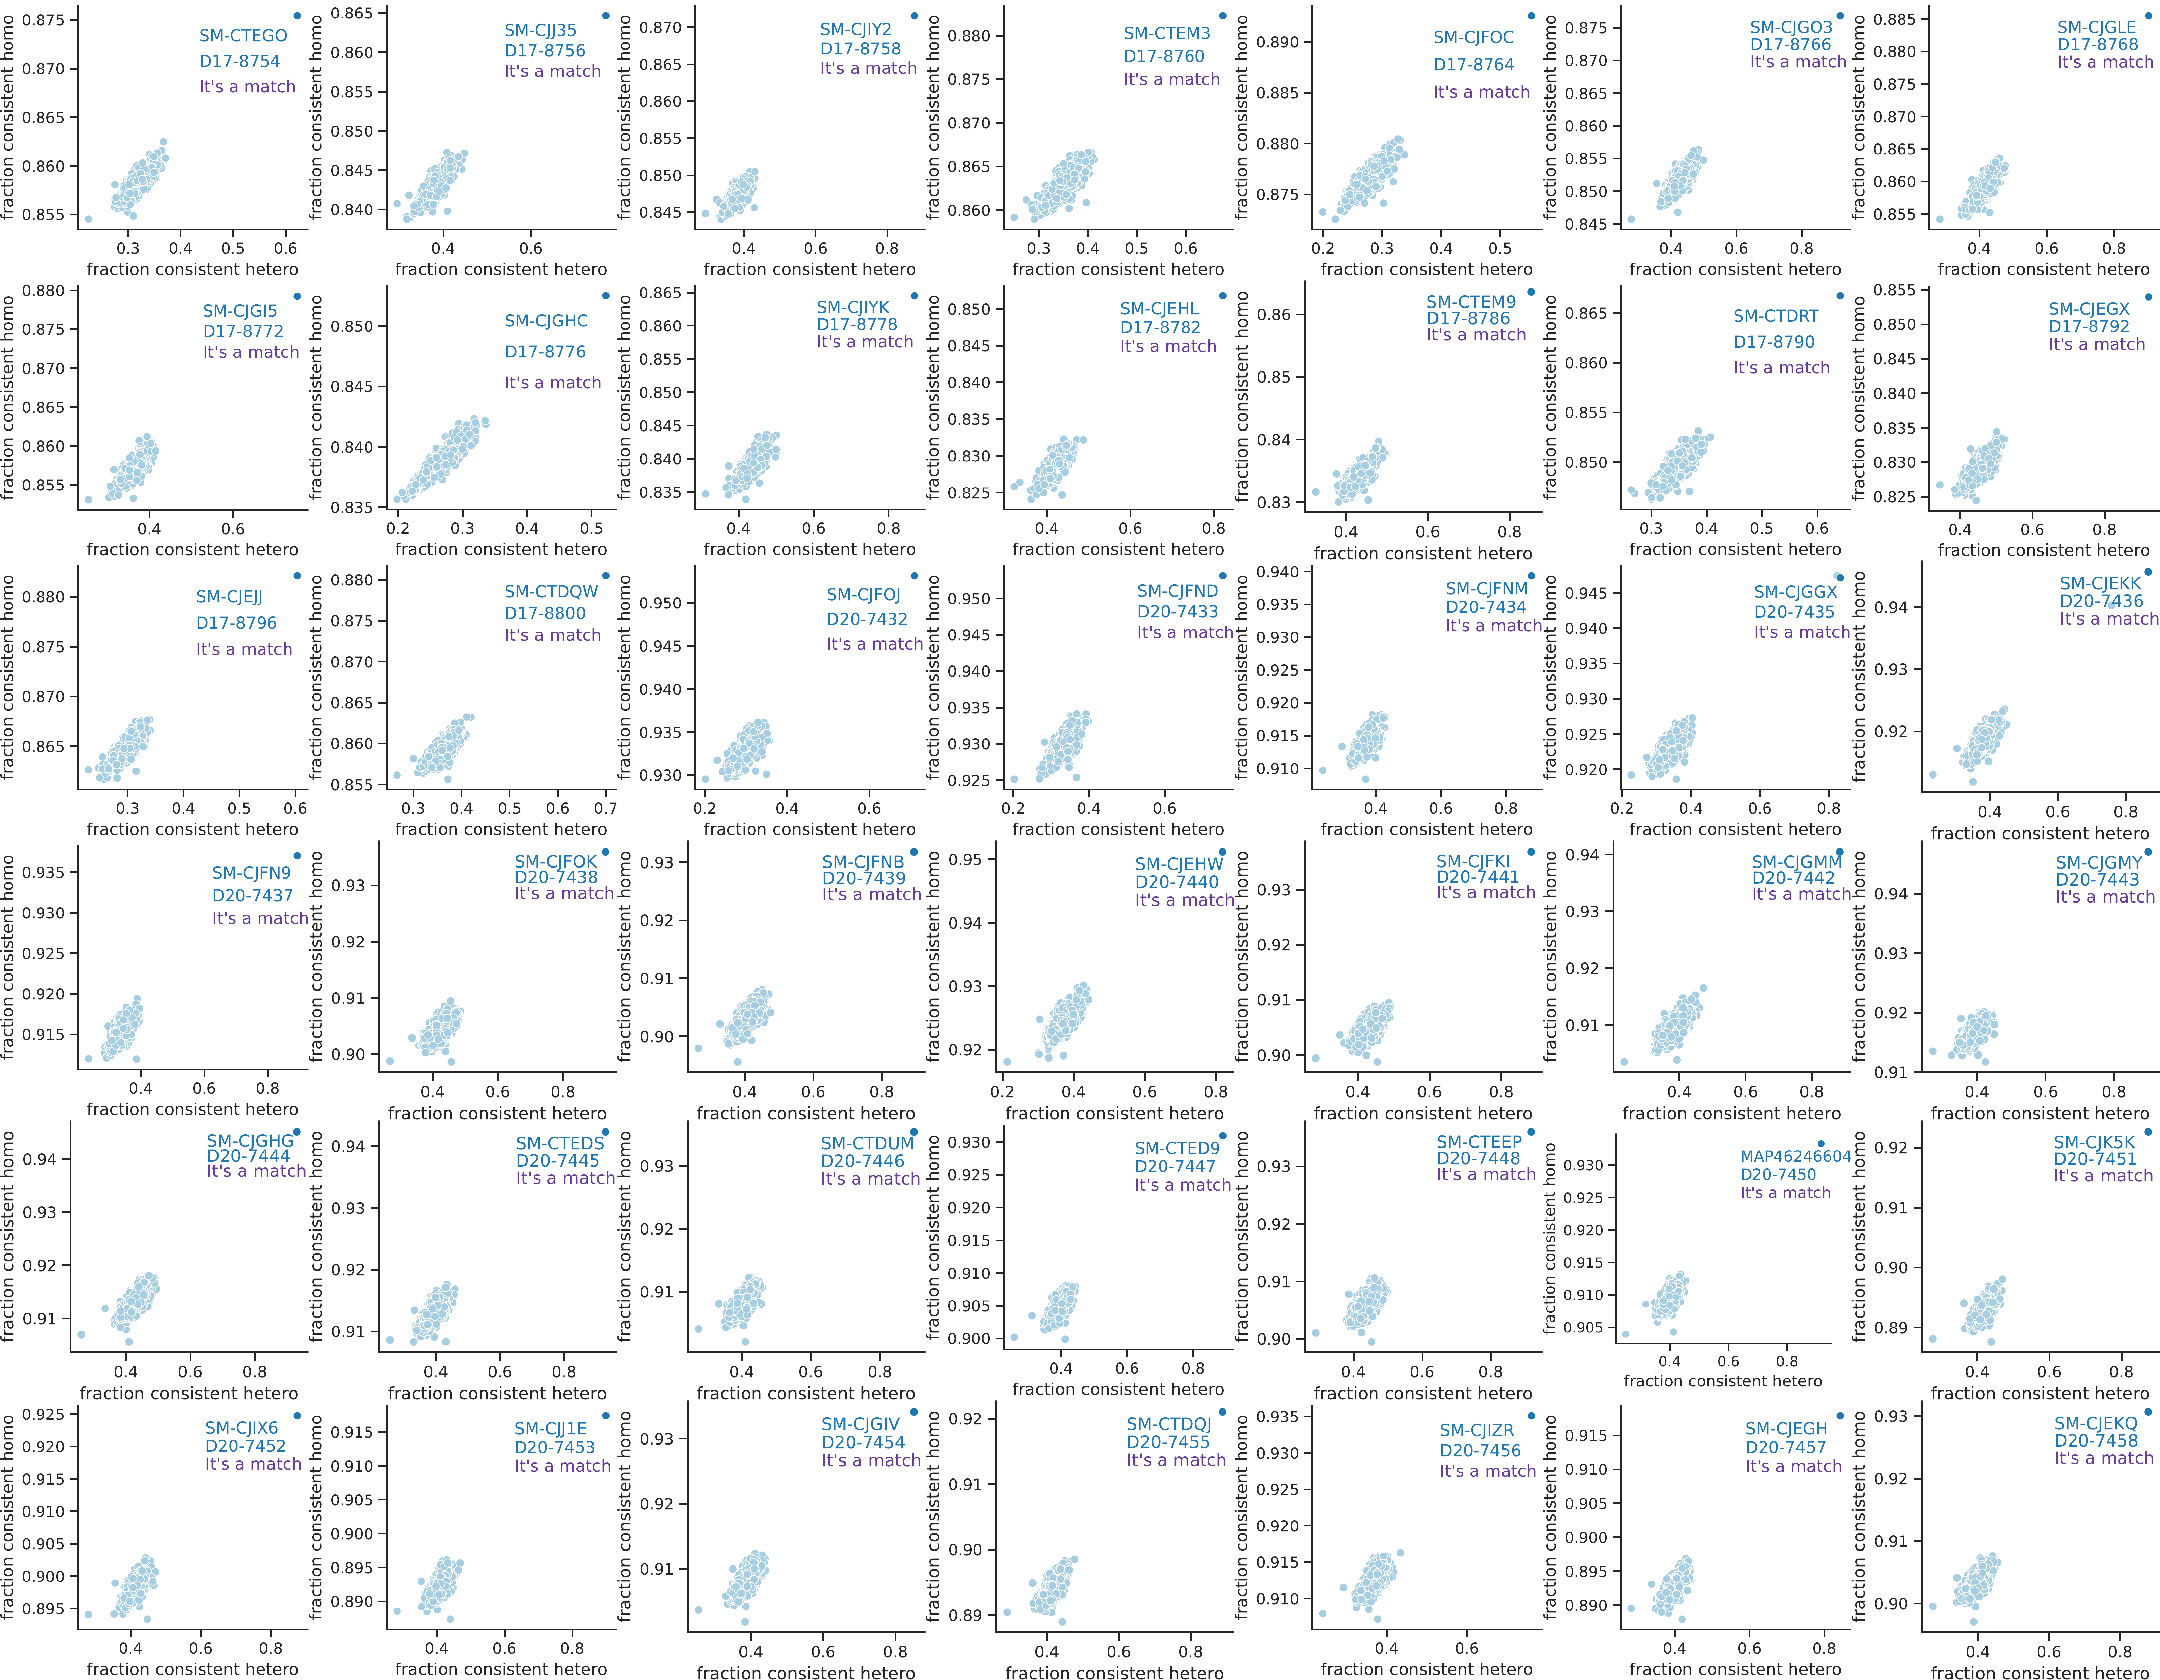

In [34]:
files = list.files(path = "./pdf_figures/.")
files = files[unlist(lapply(files, function(x) endsWith(x,'swap_res.pdf')))]
                            
plots = list()
for(i in 1:length(files)){
    plots[[i]] = image_ggplot(image_trim(image_read_pdf(paste0('./pdf_figures/', files[i]))))
}
     
options(repr.plot.width=18, repr.plot.height=14)

pdf('./pdf_figures/Extended_Figure_2.pdf', width=18, height=14)
do.call("grid.arrange", c(plots, ncol=7))
dev.off()
                            
do.call("grid.arrange", c(plots, ncol=7))


<u>**Extended Figure 3**</u>
<a name="EF3"></a>
##### batch correction overview

In [3]:
# metadata
all_data = readRDS('./processed_data/single_cell//stats_input_data.rds')

# cell coordinates
coords = read.csv('./processed_data//single_cell//coords.csv', row.names=1)
colnames(coords) = c('x', 'y')

# DEGS (JBM, all..)
degs = readRDS('./processed_data/single_cell//pseudobulk_degs.rds')

In [4]:
# load the data
features = c('amyloid', 'nft','age_death', 'pmi')

# continuous variables by variant
metadata = all_data$summary
metadata$seq_batch = ifelse(metadata$seq_batch=='JBM', 'batch_1', 'batch_2')
metadata$seq_batch = factor(metadata$seq_batch, levels = c('batch_1', 'batch_2'))
metadata$LOF = ifelse(metadata$LOF==1, 'LoF', 'Con')
cols_batch = c('blue', 'pink')
names(cols_batch) = c('batch_1', 'batch_2')

cols = c('grey', 'red')
names(cols) = c('Con', 'LoF')

plt00 = boxplot_w_stats(df = as.data.frame(metadata), x = 'seq_batch', y = features[1], palette = cols_batch, comparisons = list(c('batch_1', 'batch_2')), xlab = '', ylab = features[1], width = .5, alpha = .5)+ theme(legend.position="none")
plt01 = boxplot_w_stats(df = as.data.frame(metadata), x = 'seq_batch', y = features[2], palette = cols_batch, comparisons = list(c('batch_1', 'batch_2')), xlab = '', ylab = features[2], width = .5, alpha = .5)+ theme(legend.position="none")
plt02 = boxplot_w_stats(df = as.data.frame(metadata), x = 'seq_batch', y = features[3], palette = cols_batch, comparisons = list(c('batch_1', 'batch_2')), xlab = '', ylab = features[3], width = .5, alpha = .5)+ theme(legend.position="none")
plt03 = boxplot_w_stats(df = as.data.frame(metadata), x = 'seq_batch', y = features[4], palette = cols_batch, comparisons = list(c('batch_1', 'batch_2')), xlab = '', ylab = features[4], width = .5, alpha = .5)+ theme(legend.position="none")
#plt04 = boxplot_w_stats(df = as.data.frame(metadata), x = 'seq_batch', y = features[5], palette = cols_batch, comparisons = list(c('batch_1', 'batch_2')), xlab = '', ylab = features[5], width = .5, alpha = .5)+ theme(legend.position="none")

# categorical variables by genotype
features = c('ad_reagan', 'msex','apoe_genotype', 'cogdx')
plt10 = get_barplot(as.data.frame(metadata), 'seq_batch', features[1])
plt11 = get_barplot(as.data.frame(metadata), 'seq_batch', features[2])
plt12 = get_barplot(as.data.frame(metadata), 'seq_batch', features[3])
plt13 = get_barplot(as.data.frame(metadata), 'seq_batch', features[4])
#plt14 = get_barplot(as.data.frame(metadata), 'seq_batch', features[5])

cont_plots = (plt00|plt01|plt02|plt03)#|plt04)
disc_plots = (plt10|plt11|plt12|plt13)#|plt14)


In [6]:
colData = read.csv('./processed_data/single_cell/colData.csv')

In [27]:
coords = colData[,c('x', 'y', 'ABCA7LoF', 'seq_batch', 'gaussian_liklihood', 'annotations2')]
coords$LoF = ifelse(coords$ABCA7LoF==1, 'LoF', 'Con')
coords$seq_batch = ifelse(coords$seq_batch=='JBM', 'batch_1', 'batch_2')
coords$node_centrality = coords$gaussian_liklihood
head(coords)

,x,y,ABCA7LoF,seq_batch,gaussian_liklihood,annotations2,LoF,node_centrality
,<dbl>,<dbl>,<int>,<chr>,<dbl>,<chr>,<chr>,<dbl>
1,17.0028060,4.753179,1,batch_1,268.3954,Opc,LoF,268.3954
2,-2.6438406,11.595880,1,batch_1,270.3380,Ast,LoF,270.3380
3,-0.1138574,2.885270,1,batch_1,258.0939,Oli,LoF,258.0939
4,-1.8815118,1.998334,1,batch_1,261.4621,Oli,LoF,261.4621
5,-2.9469936,11.175462,1,batch_1,270.1528,Ast,LoF,270.1528
6,2.9525402,8.349187,1,batch_1,274.2446,Ex,LoF,274.2446


In [28]:
cols_batch = c('pink', 'blue')
names(cols_batch) = c('batch_1', 'batch_2')

# plot cells
size=6
con = plot_coords_by_grp(coords[coords$LoF=='Con',], 'x', 'y', 'LoF', 'node_centrality', cols)+
annotate(geom="text", x=-2, y=13, label="Control",color=cols['Con'], size=size, fontface='italic')

lof = plot_coords_by_grp(coords[coords$LoF=='LoF',], 'x', 'y', 'LoF', 'node_centrality', cols)+
annotate(geom="text", x=-2, y=13, label="ABCA7 LoF",color=cols['LoF'], size=size, fontface='italic')

batch1 = plot_coords_by_grp(coords[coords$seq_batch=='batch_1',], 'x', 'y', 'seq_batch', 'node_centrality', cols_batch)+
annotate(geom="text", x=-2, y=13, label="Batch #1",color=cols_batch['batch_1'], size=size, fontface='italic')

batch2 = plot_coords_by_grp(coords[coords$seq_batch=='batch_2',], 'x', 'y', 'seq_batch', 'node_centrality', cols_batch)+
annotate(geom="text", x=-2, y=13, label="Batch #2",color=cols_batch['batch_2'], size=size, fontface='italic')

# plot deg correlations
out = lapply(names(degs$degs_all), function(x) merge(degs$degs_all[[x]]$res, degs$degs_JBM[[x]]$res, by = 0))
names(out) = names(degs$degs_all)        

plt1 = plot_degs(out$Ex, out$Ex[order(out$Ex$P.Value.x, decreasing=F),'Row.names'][1:5], 'Excitatory neurons') # choose specific genes of interest to show
plt2 = plot_degs(out$In,  out$In[order(out$In$P.Value.x, decreasing=F),'Row.names'][1:5], 'Inhibitory neurons')
plt3 = plot_degs(out$Ast,  out$Ast[order(out$Ast$P.Value.x, decreasing=F),'Row.names'][1:5], 'Astrocytes')
plt4 = plot_degs(out$Mic,  out$Mic[order(out$Mic$P.Value.x, decreasing=F),'Row.names'][1:5], 'Microglia')
plt5 = plot_degs(out$Oli,  out$Oli[order(out$Oli$P.Value.x, decreasing=F),'Row.names'][1:5], 'Oligodendrocytes')
plt6 = plot_degs(out$Opc,  out$Opc[order(out$Opc$P.Value.x, decreasing=F),'Row.names'][1:5], 'OPCs')

df = as.data.frame(table(coords$celltype, coords$batch))
props = ggplot(coords, aes(x=seq_batch, fill=annotations2), color='black') + geom_bar(position = "fill", color='black')+ scale_fill_manual(values = (colors[as.character(unique(coords$annotations2))])) + theme_classic() + ylab('proportion') + xlab('')

Warning message in wilcox.test.default(c(0, 1.15125, 11.79375, 0.531, 0, 6.93833333333333, :
"cannot compute exact p-value with ties"
Warning message in wilcox.test.default(c(6, 5.25, 5.83333333333333, 7, 4.08333333333333, :
"cannot compute exact p-value with ties"
Warning message in wilcox.test.default(c(0, 1.15125, 11.79375, 0.531, 0, 6.93833333333333, :
"cannot compute exact p-value with ties"
Warning message in wilcox.test.default(c(6, 5.25, 5.83333333333333, 7, 4.08333333333333, :
"cannot compute exact p-value with ties"


png 
  2

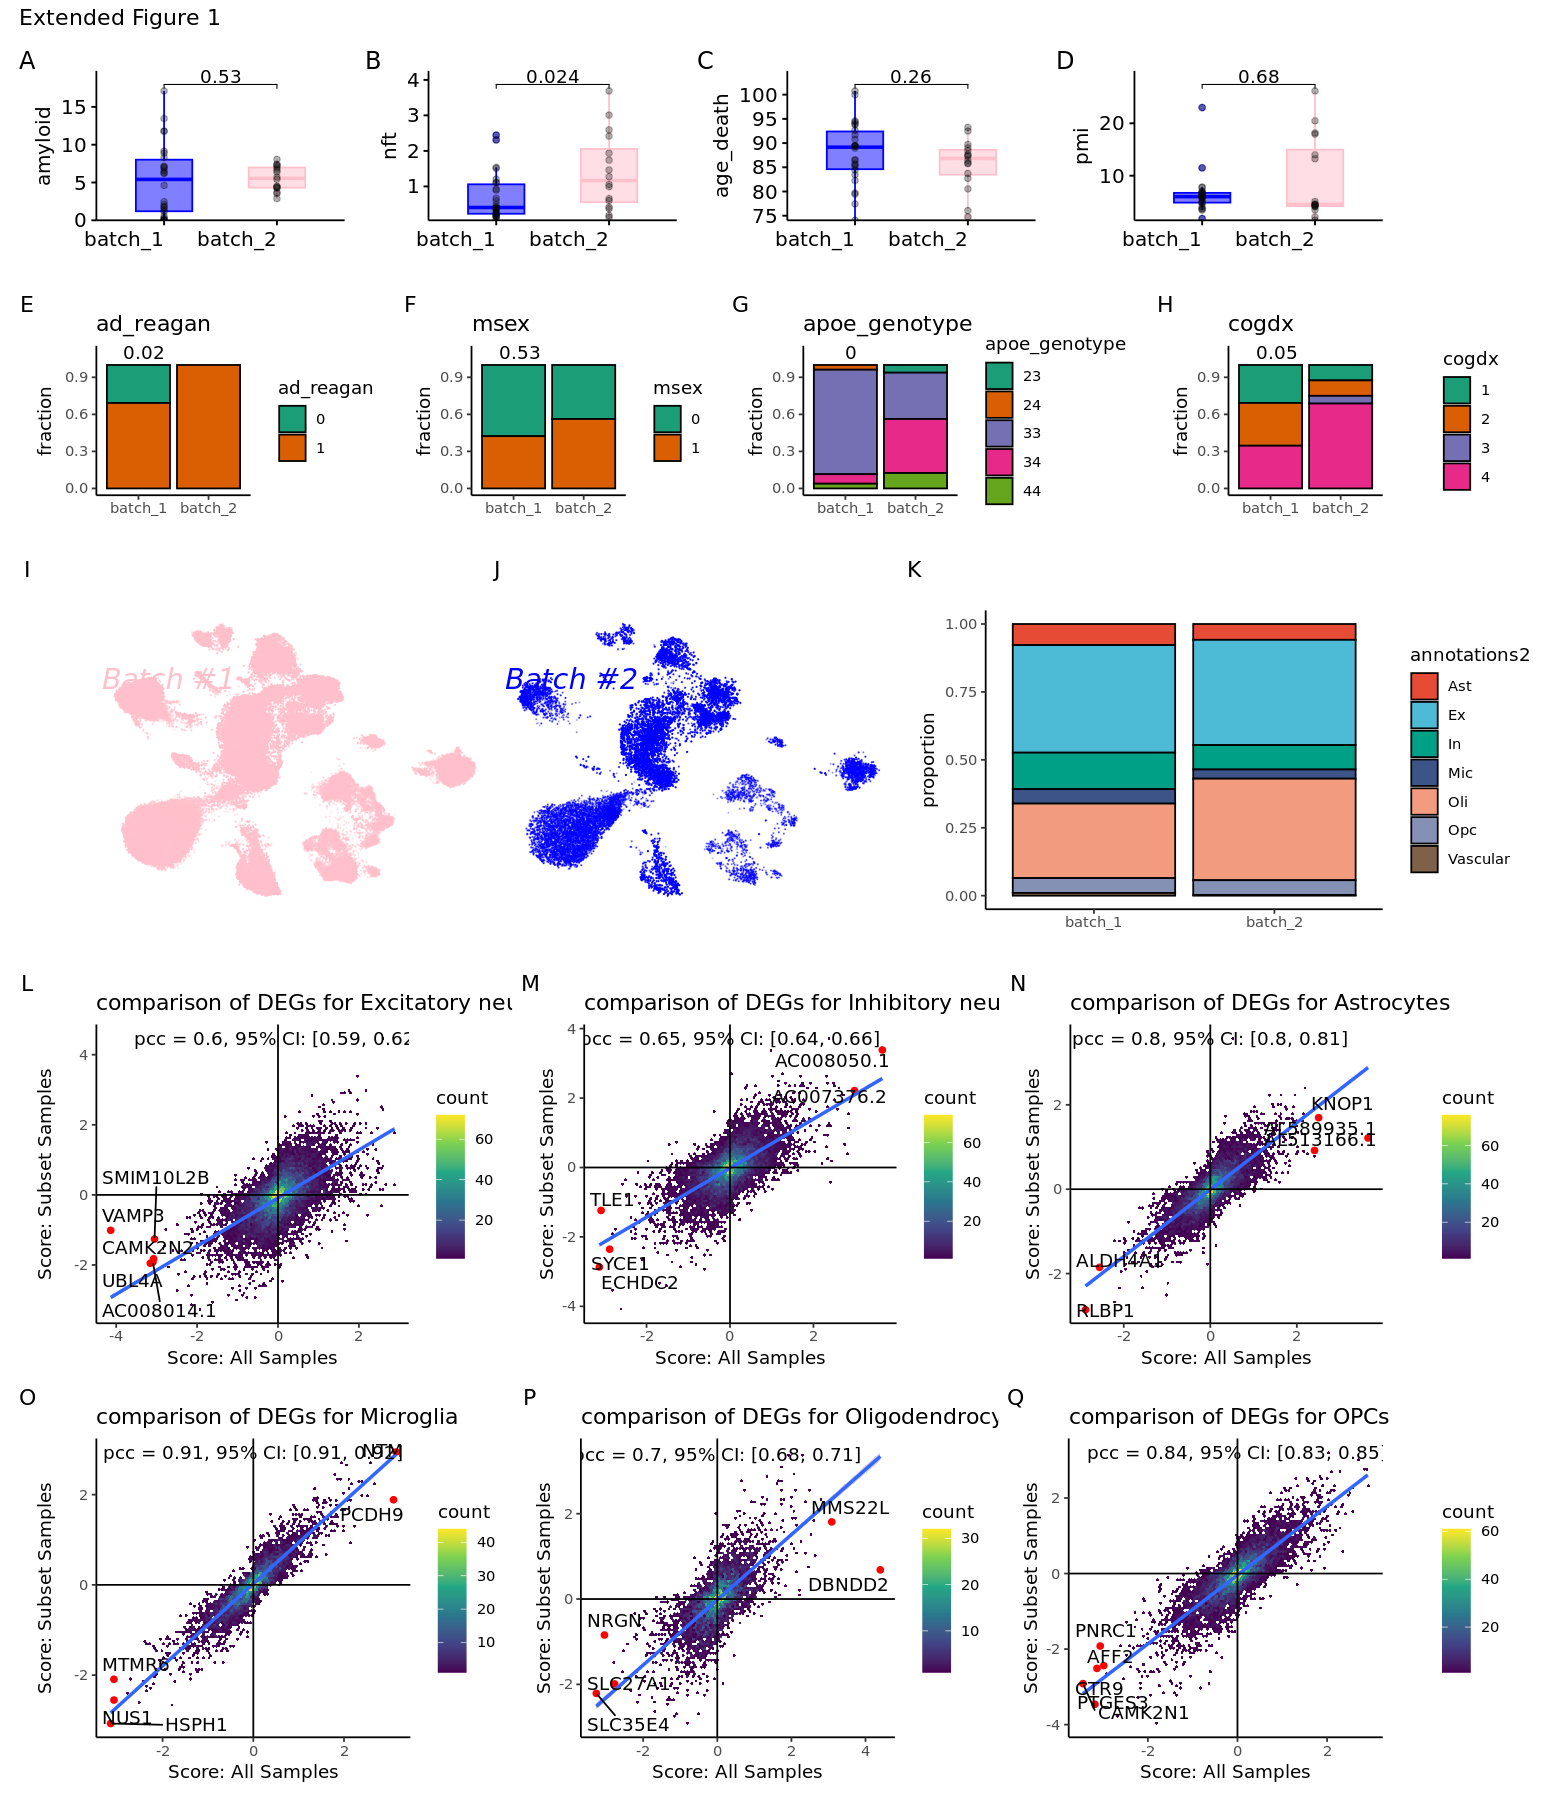

In [29]:
options(repr.plot.width=13, repr.plot.height=15)

extended2 = (cont_plots / disc_plots / (batch1 | batch2 | props) / (plt1 | plt2 | plt3) / (plt4 | plt5 | plt6)) + plot_layout(heights=c(2,2,4,4,4)) + plot_annotation(tag_levels = 'A', title='Extended Figure 1')

extended2 
pdf('./pdf_figures/Extended_Figure_3.pdf', width=13, height=15)
extended2
dev.off()

<u>**Extended Figure 4**</u>
<a name="EF3"></a>
##### QC and celltype anno overview

In [81]:
# per-cell marker expression
marker_logcounts_melted = read.csv('./processed_data/for_plotting/marker_logcounts_melted.csv')

# various QC/stats metrics
df = read.csv('./processed_data/for_plotting/celltype_annos_qc.csv')
data = readRDS('./processed_data/for_plotting/celltype_anno_counts.rds')

In [ ]:
# also show cluster enrichments below

png 
  2

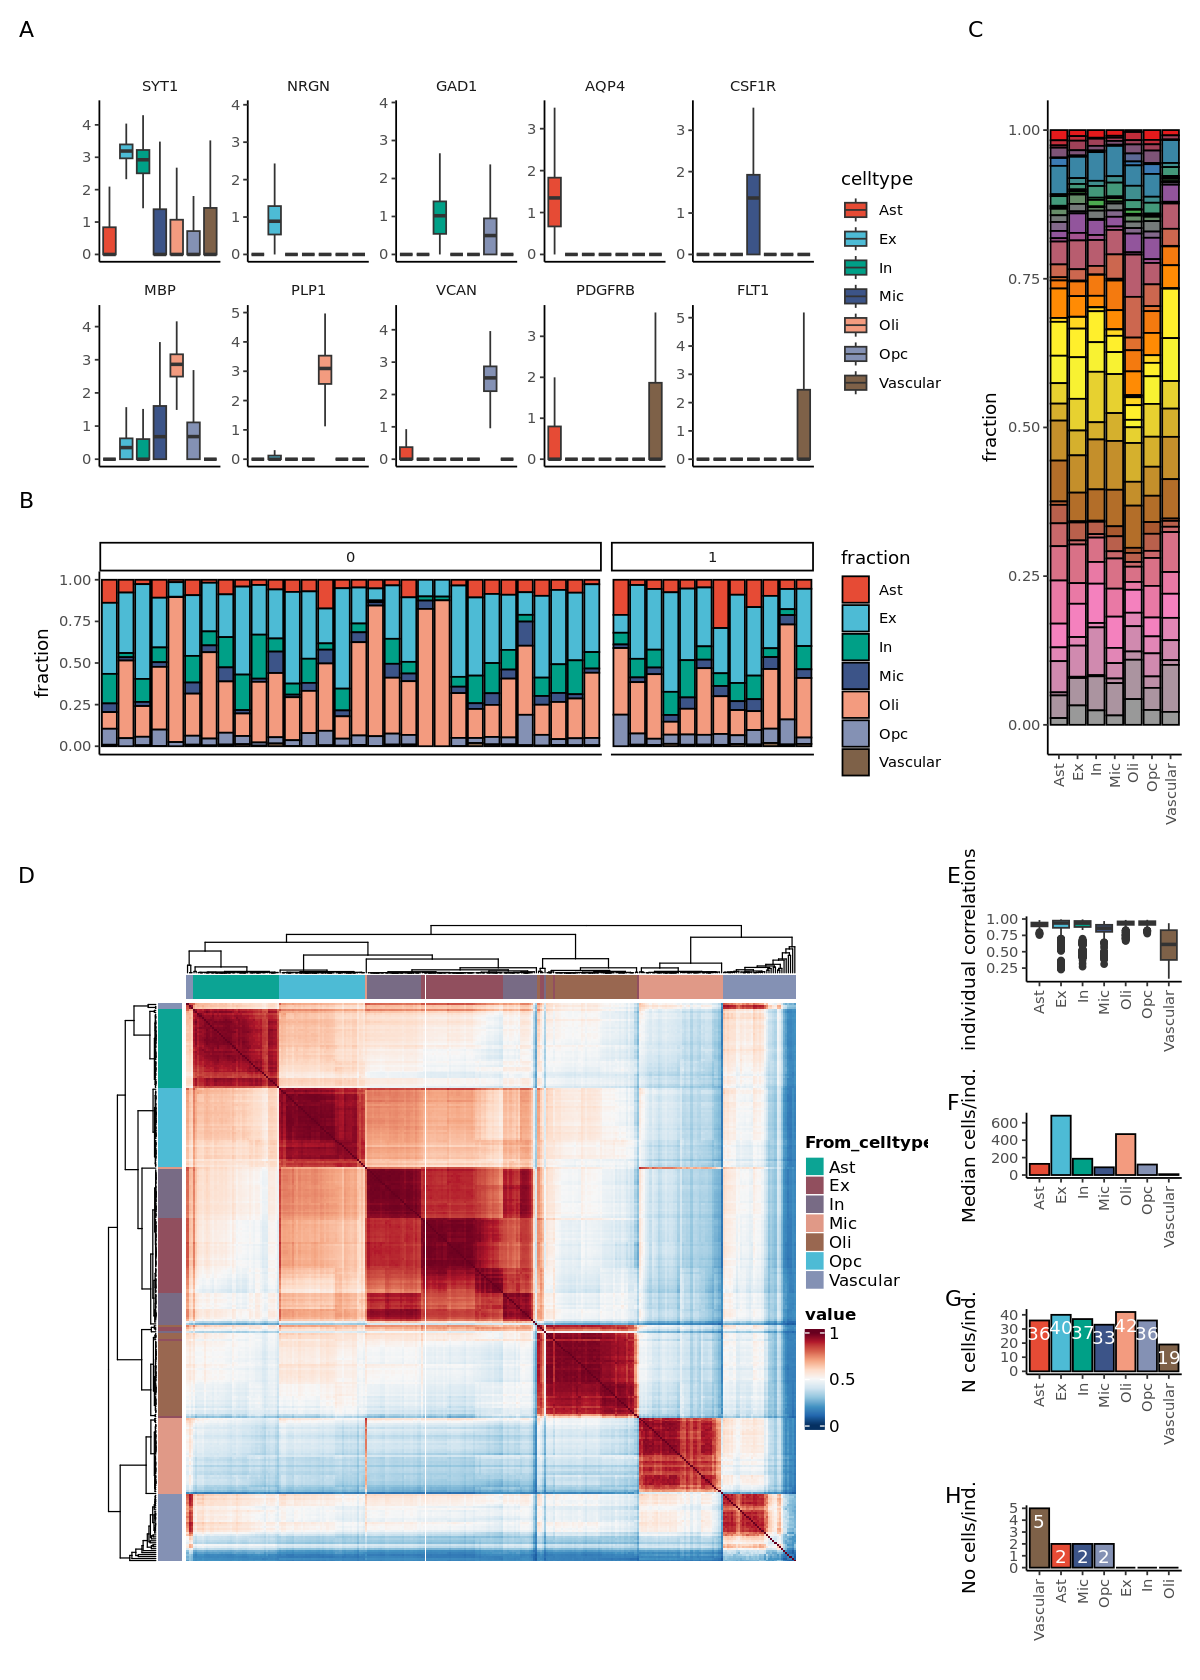

In [82]:
# plot marker genes
marker_genes = c('SYT1', 'NRGN', 'GAD1', 'AQP4', 'CSF1R', 'MBP', 'PLP1', 'VCAN',  'PDGFRB', 'FLT1')
#marker_logcounts_melted$celltype[marker_logcounts_melted$celltype=='Endo'] = 'Vascular'
marker_logcounts_melted$Var1 = factor(marker_logcounts_melted$Var1, levels = marker_genes)

plt0 = ggplot(marker_logcounts_melted, aes(x = celltype, y = value, fill = celltype)) + geom_boxplot(outlier.shape = NA)  + facet_wrap(Var1 ~ ., ncol = 5, scales = 'free')+ theme_classic() + theme( strip.background = element_blank() )  + scale_fill_manual(values = colors[marker_logcounts_melted$celltype])

# plot fractions
#df$celltype[df$celltype=='Endo'] = 'Vascular'
cells = unique(df$celltype)
df$celltype = factor(df$celltype, levels = cells[order(cells)])
colourCount = length(unique(df$projid))
getPalette = colorRampPalette(brewer.pal(9, "Set1"))

plt1 = ggplot(df) + aes(x = factor(projid), fill = factor(celltype)) + geom_bar(color = "black", position = "fill") + ggtitle('individual-level cell fractions') + xlab("LoF variants") + ylab("fraction") + theme_classic() + labs(x = "", fill = 'fraction') + scale_fill_manual(values = colors[as.character(df$celltype)]) + facet_grid(. ~ LOF, scales = "free", space = "free") + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))
plt2 = ggplot(df) + aes(fill = factor(projid), x = factor(celltype)) + geom_bar(color = "black", position = "fill") + ggtitle('cell-level individual fractions') + xlab("LoF variants") + ylab("fraction") + theme_classic() + labs(x = "", fill = 'fraction') + scale_fill_manual(values = getPalette(colourCount)) + theme(legend.position = "none")

# plot correlation heatmap
C = unname(colors[c('Ex', 'In', 'Ast', 'Mic', 'Oli', 'Opc')])

d = data$ind_cor%>%melt(.)%>%mutate(X=Var1)%>%mutate(Y=Var2)%>%
separate(., 'Var1', c('From_celltype', 'From_projid'), '[.]')%>%
separate(., 'Var2', c('To_celltype', 'To_projid'), '[.]')
#d$From_celltype[d$From_celltype=='Per'] = 'Vascular'
#d$To_celltype[d$To_celltype=='Per'] = 'Vascular'

plt3 = d%>%as_tibble(.)%>%
tidyHeatmap::heatmap(column_title='',row_title='',.row = X,.column = Y,.value = value,show_heatmap_legend =TRUE,show_column_names=F, show_row_names=F, palette_value = circlize::colorRamp2(seq(0, 1, length.out = 11), rev(RColorBrewer::brewer.pal(11, "RdBu"))), clustering_distance_rows='pearson', clustering_distance_columns='pearson')%>%
add_tile(From_celltype, palette=C, show_annotation_name=FALSE)%>%
add_tile(To_celltype, palette=C, show_annotation_name=FALSE, show_legend=FALSE)%>%wrap_heatmap()

# plot correlation as boxplot
df_subset = data$cross_cors
df_subset$celltype1 = as.character(df_subset$celltype1)
df_subset$celltype2 = as.character(df_subset$celltype2)
#df_subset$celltype1[df_subset$celltype1=='Per'] = 'Vascular'
#df_subset$celltype2[df_subset$celltype2=='Per'] = 'Vascular'

plt4 = ggplot(df_subset) + aes(fill = factor(celltype1), x = factor(celltype1), y = value) + geom_boxplot() + ylab("individual correlations") + theme_classic() + scale_fill_manual(values = colors[as.character(df_subset$celltype1)]) + theme(legend.position = "none")

# plot barplots
df = data$median_cells
df$celltype = as.character(df$celltype)
#df$celltype[df$celltype=='Endo'] = 'Vascular' 
plt5 = ggplot(df) + aes(fill = factor(celltype), x = factor(celltype), y = median) + geom_bar(color = "black", stat="identity") + ylab("Median cells/ind.") + theme_classic() + scale_fill_manual(values = colors[as.character(df$celltype)]) + theme(legend.position = "none")

df = data$N_cells
df$celltype = as.character(df$celltype)
#df$celltype[df$celltype=='Endo'] = 'Vascular' 
plt6 = ggplot(df) + aes(fill = factor(celltype), x = factor(celltype), y = N) + geom_bar(color = "black", stat="identity") + ylab("N cells/ind.") + theme_classic() + scale_fill_manual(values = colors[as.character(df$celltype)]) + theme(legend.position = "none") + 
  geom_text(label = df$N, vjust = 1.5, colour = "white")

df = data$no_cells
plt7 = ggplot(df) + aes(fill = factor(celltype), x = factor(celltype), y = N) + geom_bar(color = "black", stat="identity") + ylab("No cells/ind.") + theme_classic() + scale_fill_manual(values = colors[as.character(df$celltype)]) + theme(legend.position = "none") + 
  geom_text(label = df$N, vjust = 1.5, colour = "white")

# add some plot formatting
plt0 = plt0 + ylab('') + xlab('') +  theme(axis.title.x=element_blank(),axis.text.x=element_blank(), axis.ticks.x=element_blank())
plt1 = plt1 + ggtitle('')+  theme(axis.title.x=element_blank(),axis.text.x=element_blank(), axis.ticks.x=element_blank())
plt2 = plt2 + ggtitle('') + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))
plt4 = plt4 + xlab('') +ggtitle('')+ theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))
plt5 = plt5 + xlab('') + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))
plt6 = plt6 + xlab('') + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))
plt7 = plt7 + xlab('') + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))

options(repr.plot.width=10, repr.plot.height=14)

extended3 = (((((plt0 / plt1) + plot_layout(heights=c(2,1))) | plt2) + plot_layout(widths=c(8,1.5)))/((plt3|(plt4/plt5/plt6/plt7))+plot_layout(widths=c(8, 1.5))))+plot_layout(widths=c(5,3,8))  + plot_annotation(tag_levels = 'A')

extended3 
pdf('./pdf_figures/Extended_Figure_3.pdf', width=9, height=12.6)
extended3
dev.off()

<u>**Extended Figure 5**</u>
<a name="EF5"></a>
##### DEGS and GO overview

In [71]:
degs = readRDS('./processed_data/single_cell/pseudobulk_degs.rds')
out = lapply(names(degs$degs_all), function(x) merge(degs$degs_all[[x]]$res, degs$degs_exclude_both[[x]]$res, by = 0))
names(out) = names(degs$degs_all)        

plt1 = plot_degs(out$Ex, out$Ex[order(out$Ex$P.Value.x, decreasing=F),'Row.names'][1:5], 'Excitatory neurons') # choose specific genes of interest to show
plt2 = plot_degs(out$In,  out$In[order(out$In$P.Value.x, decreasing=F),'Row.names'][1:5], 'Inhibitory neurons')
plt3 = plot_degs(out$Ast,  out$Ast[order(out$Ast$P.Value.x, decreasing=F),'Row.names'][1:5], 'Astrocytes')
plt4 = plot_degs(out$Mic,  out$Mic[order(out$Mic$P.Value.x, decreasing=F),'Row.names'][1:5], 'Microglia')
plt5 = plot_degs(out$Oli,  out$Oli[order(out$Oli$P.Value.x, decreasing=F),'Row.names'][1:5], 'Oligodendrocytes')
plt6 = plot_degs(out$Opc,  out$Opc[order(out$Opc$P.Value.x, decreasing=F),'Row.names'][1:5], 'OPCs')


In [72]:
source('./ABCA7lof2/degs.r')
degs = readRDS('./processed_data/single_cell//pseudobulk_degs.rds')$degs_all

In [73]:
genes = unique(unlist(lapply(names(degs), function(x) rownames(degs[[x]]$res[degs[[x]]$res$P.Value<0.005,]))))

In [74]:
# plot degs as heatmap
scores = get_deg_scores(degs)

sele_scores = list()
for(i in names(scores)){
    curr = as.data.frame(scores[[i]]$scores[genes])
    colnames(curr) = 'score'
    curr$celltype = i
    curr$gene = names(scores[[i]]$scores[genes])
    sele_scores[[i]] = na.omit(curr)
}

df = do.call('rbind', sele_scores)

df = df%>%pivot_wider(., names_from = celltype, values_from=score)
df = as.data.frame(df)
rownames(df) = df$gene
g = df$gene
df$gene = NULL
df[is.na(df)] = 0
df$gene = g

df = melt(df, id='gene')
head(df)

genes_hmap = df %>% as_tibble(.) %>%
tidyHeatmap::heatmap(column_title='',row_title='',.row = gene,.column = variable,.value = value, row_names_gp = gpar(fontsize = 11),
                     palette_value = circlize::colorRamp2(seq(-5, 5, length.out = 11), rev(RColorBrewer::brewer.pal(11, "RdBu"))))%>%wrap_heatmap()

,gene,variable,value
,<chr>,<fct>,<dbl>
1,CAMK2N1,Opc,-3.448817
2,PTGES3,Opc,-3.182553
3,CTR9,Opc,-3.135589
4,PNRC1,Opc,-3.063824
5,AFF2,Opc,-2.985984
6,KIF26B,Opc,-2.941767


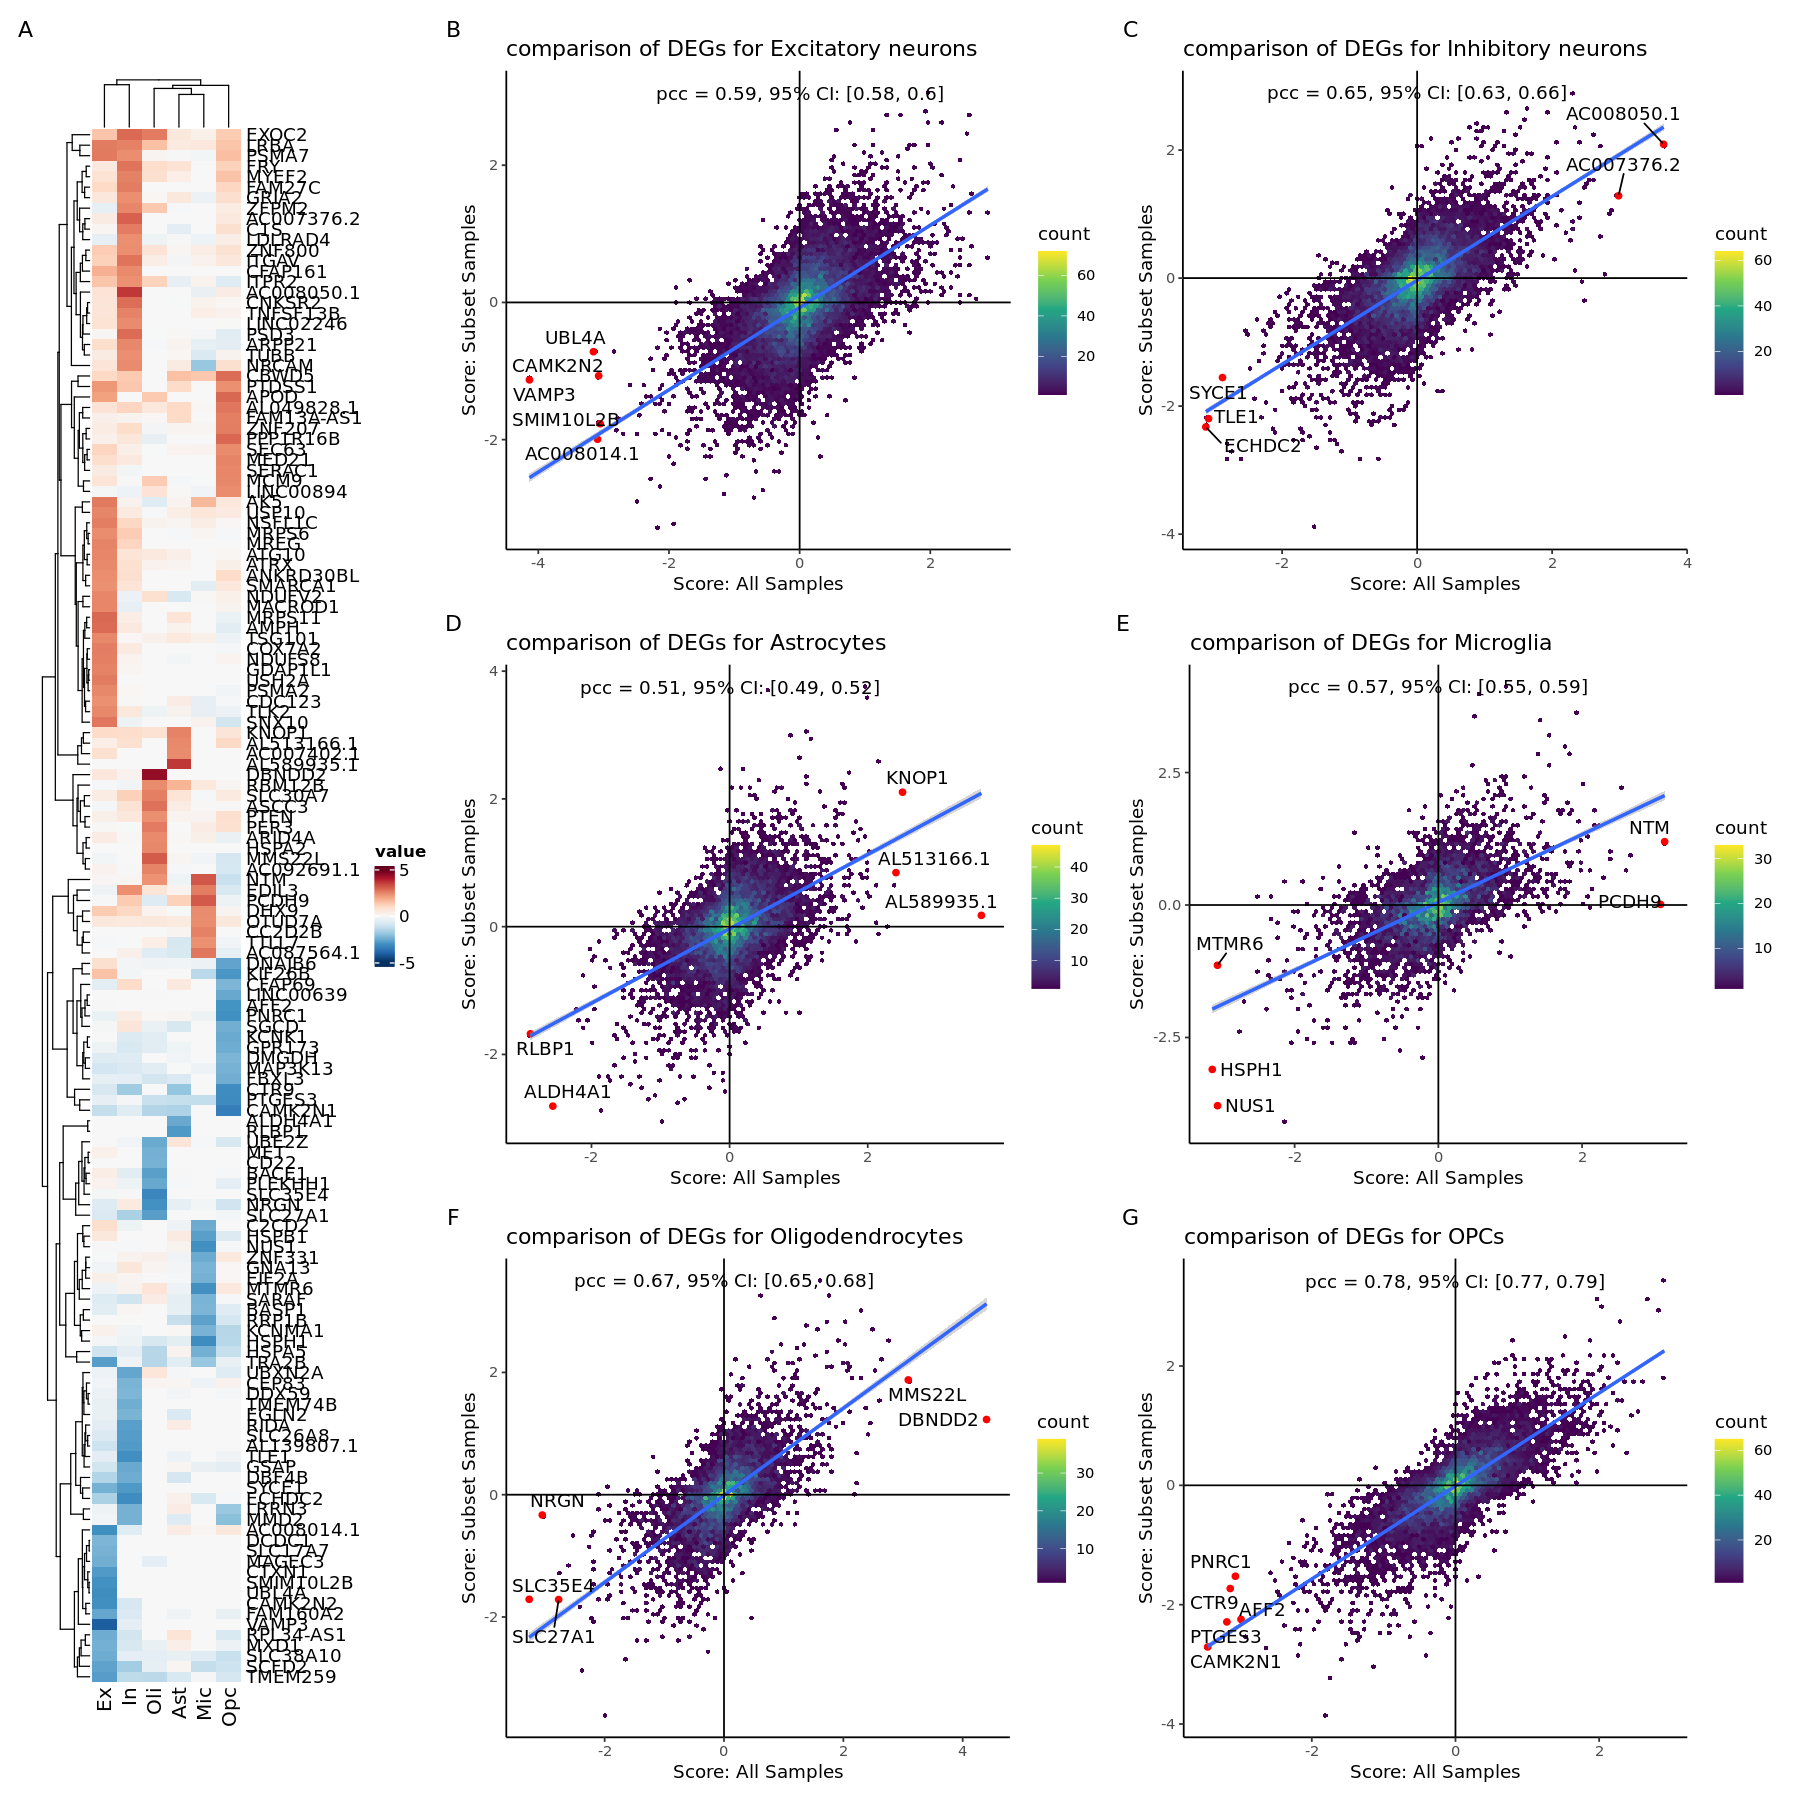

In [75]:
options(repr.plot.width=15, repr.plot.height=15)

extended4 = (genes_hmap|((plt1 | plt2)/(plt3|plt4)/(plt5|plt6))) + plot_layout(widths=c(1,3))+ plot_annotation(tag_levels = 'A')
extended4

In [1]:
### UMAP projections overview and specific genes

<u>**Extended Figure 6**</u>
<a name="EF5"></a>
##### KL clustering overview

In [3]:
cartoon = image_ggplot(image_trim(image_read('./svgs/KL_cartoon.png')))
extended5 = cartoon  + plot_annotation(tag_levels = 'A', title='Extended Figure 4')

options(repr.plot.width=11, repr.plot.height=14)

extended5
pdf('./pdf_figures/Extended_Figure_5.pdf', width=11, height=14)
extended5
dev.off()

### and supplmentary clustering analysis for the other celltypes

ERROR: Error in image_ggplot(image_trim(image_read("./svgs/KL_cartoon.png"))): could not find function "image_ggplot"


<u>**Extended Figure 7**</u>
<a name="EF7"></a>
##### Lipidomics overview

In [ ]:
# lipidomics data
data = readRDS('./processed_data/for_plotting/lipidomics.rds')
key = read.csv('./raw_data/ngn2_data/lipidkey.csv', sep = '\t')


In [ ]:
sce = data$ngn2_all
sce = sce[,sce$treatment!='Choline']

# plot correlations
d = cor(counts(sce)) %>% melt(.)
d$LoF = colData(sce)[d$Var1,'Genotype']
d$LoF2 = colData(sce)[d$Var2,'Genotype']
d$b = colData(sce)[d$Var1,'treatment']
d$b2 = colData(sce)[d$Var2,'treatment']
d$b = ifelse(d$b=='H2O', 'batch_1', 'batch_2')
d$b2 = ifelse(d$b2=='H2O', 'batch_1', 'batch_2')

p2 = d %>% as_tibble(.) %>%
tidyHeatmap::heatmap(column_title='',row_title='',.row = Var1,.column = Var2,.value = value,show_heatmap_legend =TRUE, show_row_names=F, show_column_names=F, palette_value = circlize::colorRamp2(seq(0, 1, length.out = 11), rev(RColorBrewer::brewer.pal(11, "RdBu"))), clustering_distance_columns='pearson', clustering_distance_rows='pearson')%>%
add_tile(LoF, palette=c('grey', 'red'), show_annotation_name=FALSE, show_legend=TRUE)%>%
add_tile(LoF2, palette=c('grey', 'red'), show_annotation_name=FALSE, show_legend=FALSE)%>%
add_tile(b, palette=c('purple', 'blue'), show_annotation_name=FALSE, show_legend=TRUE)%>%
add_tile(b2, palette=c('purple', 'blue'), show_annotation_name=FALSE, show_legend=FALSE)%>%wrap_heatmap()

# plot scatterplot between batches
sample1 = sign(rowData(sce)$stats.log_ratio.s2.over.s1.)*rowData(sce)$stats.log_p_value.s2.over.s1.
sample2 = sign(rowData(sce)$stats.log_ratio.s4.over.s3.)*rowData(sce)$stats.log_p_value.s4.over.s3.
df = as.data.frame(cbind(sample1, sample2))
df$Row.names = rowData(sce)$lipid.class
df$Row.names = ifelse(abs(df$sample1)>1.3 & abs(df$sample2)>1.3, df$Row.names, '')
gene = c('Cer','PC','TG')
p3 = plot_lipid_diff(df, gene, 'con vs LoF batch comparison', 'Con vs LoF batch 2', 'Con vs LoF batch 1') #+ xlim(-2.5,5) + ylim(-2.5,5)

# plot fractions
key = key[!duplicated(key$Key),]
rownames(key) = key$Key

meta = rowData(sce)
meta$class = key[meta$lipid.class,'Class']

meta$change = ifelse(meta$pvals_both_batch<0.005 & meta$logfc_both_batch>0, 'up', 
       ifelse(meta$pvals_both_batch<0.005 & meta$logfc_both_batch<0, 'down', 'unchanged'))

# have to figure out the NA values
meta$change = factor(meta$change, levels = (c('up', 'down', 'unchanged')))
meta = na.omit(as.data.frame(meta))
x = colSums(table(meta$change, meta$class)[1:2,])

meta$class = factor(meta$class, levels = (names(x[order(x)])))
p4 = ggplot(meta, aes(x=class, fill=change), color='black') + scale_fill_manual(values = c('red', 'blue', 'white')) + geom_bar(position = "fill", color='black') + theme_classic() + ylab('proportion') + xlab('') + theme(axis.text.x=element_text(angle=45, hjust=1))

meta = meta[meta$class%in%c('Neutral lipids', 'Phospholipids', 'Sphingolipids'),]
x = colSums(table(meta$change, meta$lipid.class)[1:2,])
meta$lipid.class = factor(meta$lipid.class, levels = (names(x[order(x)])))

p5 = ggplot(meta, aes(x=lipid.class, fill=change), color='black') + scale_fill_manual(values = c('red', 'blue', 'white')) + geom_bar(position = "fill", color='black') + theme_classic() + ylab('proportion') + xlab('') +  facet_grid(. ~ class, scales="free", space="free")+ theme(axis.text.x=element_text(angle=45, hjust=1))+ theme(legend.position = "none")

# plot table
tbl = as.data.frame(table(meta$lipid.class, meta$change))
tbl = tbl%>%pivot_wider(values_from=Freq, names_from=Var2)
tbl$total = rowSums(cbind(tbl$up, tbl$down))
tbl = tbl[order(tbl$total, decreasing=T),]
tbl$percentage = round(tbl$total/(tbl$total+tbl$unchanged), 2)*100
tbl = as.data.frame(tbl)
rownames(tbl) = tbl$Var1
tbl$Var1 = NULL
tbl = tbl[, c('up', 'down', 'total', 'percentage')]
colnames(tbl) = c('U', 'D', 'T', '%')
tbl$Name = key[rownames(tbl),c('subclass')]
p6 = gridExtra::tableGrob(tbl)


options(repr.plot.width=11, repr.plot.height=11)

extended7 = (((p2/p3)|p6)/p5) + plot_layout(heights=c(5,1))+ plot_annotation(tag_levels = 'A') 
extended7

pdf('./pdf_figures/Extended_Figure_7.pdf', width=11, height=11)
extended7
dev.off()

<u>**Extended Figure 8**</u>
<a name="EF8"></a>
##### CRISPRi data